In [107]:
import pandas as pd
air=pd.read_csv('/content/EastWestAirlines.csv')

# Hierarchical Clustering

In [108]:
#import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn

In [109]:
#normalization
def norm_func(i):
  x=(i-i.min())/(i.max()-i.min())
  return(x)

In [110]:
#normalized data frame
df_norm=norm_func(air.iloc[:,1:])

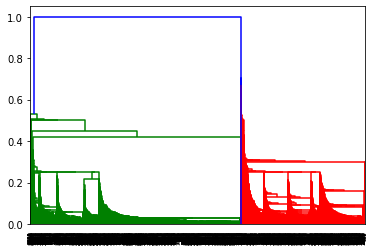

In [111]:
#dendrogram
dendrogarm=sch.dendrogram(sch.linkage(df_norm,method='single'))

In [112]:
#create clusters after examining the dendrogram
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='single')

In [113]:
#save clusters for chart
y_hc=hc.fit_predict(df_norm)
clusters_hier=pd.DataFrame(y_hc,columns=['clusters'])

In [114]:
clusters_hier

,clusters
0,1
1,1
2,1
3,1
4,0
...,...
3994,0
3995,0
3996,0
3997,1


In [115]:
air_hier=pd.DataFrame
air_hier=air
air_hier['h_clusterid']=clusters_hier

In [116]:
air_hier

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [117]:
air_hier.groupby('h_clusterid').agg(['mean']).reset_index

<bound method DataFrame.reset_index of                       ID        Balance  Qual_miles cc1_miles cc2_miles  \
                    mean           mean        mean      mean      mean   
h_clusterid                                                               
0            1744.335811   97010.442568  240.020946  2.662838  1.015541   
1            2173.169182   59807.839555   87.602462  1.705322  1.013900   
2            3606.000000  160114.000000  500.000000  1.000000  1.000000   

            cc3_miles   Bonus_miles Bonus_trans Flight_miles_12mo  \
                 mean          mean        mean              mean   
h_clusterid                                                         
0            1.018243  28876.327703   15.735135        837.258108   
1            1.008737  10227.689039    9.142971        226.292295   
2            1.000000  71954.000000   86.000000      30817.000000   

            Flight_trans_12 Days_since_enroll Award?  
                       mean             

In [161]:
air_hier.groupby('h_clusterid').count()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
h_clusterid,,,,,,,,,,,,
0,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480
1,2518,2518,2518,2518,2518,2518,2518,2518,2518,2518,2518,2518
2,1,1,1,1,1,1,1,1,1,1,1,1


# KMeans clustering

In [118]:
from sklearn.cluster import KMeans

In [119]:
air_k=pd.read_csv("/content/EastWestAirlines.csv")

In [120]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_air_k=scaler.fit_transform(air_k.iloc[:,1:])

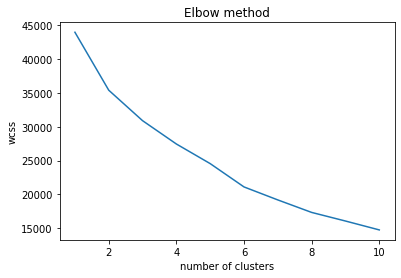

In [121]:
#finding the optimum no of cluster of kvalue
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=0)
  kmeans.fit(scaled_air_k)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

In [122]:
#build cluster algorithm
from sklearn.cluster import KMeans
cluster_new=KMeans(6,random_state=2)
cluster_new.fit(scaled_air_k)

KMeans(n_clusters=6, random_state=2)

In [123]:
cluster_new.labels_

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [124]:
#assign clusters to the data set
air_k['cluster_k']=cluster_new.labels_

In [125]:
air_k

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_k
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [126]:
air_k.groupby('cluster_k').agg(['mean']).reset_index

<bound method DataFrame.reset_index of                     ID        Balance  Qual_miles cc1_miles cc2_miles  \
                  mean           mean        mean      mean      mean   
cluster_k                                                               
0          1967.178359   59931.776457  358.199762  1.693222  1.000000   
1          2278.059903   43238.809662   46.767150  1.305797  1.000000   
2          1496.065338  137027.003322   99.815061  4.101883  1.000000   
3          1683.299213  202021.661417  676.732283  2.393701  1.000000   
4          2269.372093   68876.581395   23.255814  1.139535  2.348837   
5          1664.866667  138061.400000   78.800000  3.466667  1.000000   

          cc3_miles   Bonus_miles Bonus_trans Flight_miles_12mo  \
               mean          mean        mean              mean   
cluster_k                                                         
0          1.000000  10652.902497   10.629013        440.112961   
1          1.000483   4736.530435  

In [160]:
#kmeans has been implemented with kvalue=6 as per the elbow method 
air_k.groupby('cluster_k').count()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster_k,,,,,,,,,,,,
0,841,841,841,841,841,841,841,841,841,841,841,841
1,2070,2070,2070,2070,2070,2070,2070,2070,2070,2070,2070,2070
2,903,903,903,903,903,903,903,903,903,903,903,903
3,127,127,127,127,127,127,127,127,127,127,127,127
4,43,43,43,43,43,43,43,43,43,43,43,43
5,15,15,15,15,15,15,15,15,15,15,15,15


# DBSCAN

In [128]:
air_db=pd.read_csv("/content/EastWestAirlines.csv")

In [129]:
from sklearn.cluster import DBSCAN
air_db.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [130]:
air_db.drop(['ID'],axis=1,inplace=True)

In [131]:
array=air_db.values

In [132]:
array

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]])

In [133]:
stscaler=StandardScaler().fit(array)
x=stscaler.transform(array)

In [134]:
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [135]:
dbscan=DBSCAN(eps=1.5,min_samples=4)
dbscan.fit(x)

DBSCAN(eps=1.5, min_samples=4)

In [136]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [137]:
cl=pd.DataFrame(dbscan.labels_,columns=['clusters_db'])

In [138]:
cl

,clusters_db
0,0
1,0
2,0
3,0
4,1
...,...
3994,1
3995,1
3996,1
3997,0


In [140]:
air_db[['clusters_dbscan']]=cl

In [141]:
air_db

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_dbscan
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [142]:
air_db.dtypes

Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
clusters_dbscan      int64
dtype: object

In [143]:
air_db_new=air_db[air_db['clusters_dbscan']!=-1]

In [144]:
air_db_new.groupby('clusters_dbscan').agg(['mean']).reset_index

<bound method DataFrame.reset_index of                       Balance  Qual_miles cc1_miles cc2_miles cc3_miles  \
                         mean        mean      mean      mean      mean   
clusters_dbscan                                                           
0                56676.977658    33.19156  1.687216       1.0       1.0   
1                73200.194113    63.93397  2.628481       1.0       1.0   
2                38556.733333     0.00000  1.000000       2.0       1.0   
3                36524.250000     0.00000  1.000000       3.0       1.0   
4                56856.250000  6047.25000  1.000000       1.0       1.0   
5                31161.600000     0.00000  1.000000       2.0       1.0   

                  Bonus_miles Bonus_trans Flight_miles_12mo Flight_trans_12  \
                         mean        mean              mean            mean   
clusters_dbscan                                                               
0                 9644.678113    8.766239       

In [159]:
air_db_new.groupby('clusters_dbscan').count() # table for the number of clusters in dbscan 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clusters_dbscan,,,,,,,,,,,
0,2417,2417,2417,2417,2417,2417,2417,2417,2417,2417,2417
1,1257,1257,1257,1257,1257,1257,1257,1257,1257,1257,1257
2,15,15,15,15,15,15,15,15,15,15,15
3,8,8,8,8,8,8,8,8,8,8,8
4,4,4,4,4,4,4,4,4,4,4,4
5,5,5,5,5,5,5,5,5,5,5,5


In [145]:
dbscan=DBSCAN(eps=1.0,min_samples=6)
dbscan.fit(x)

DBSCAN(eps=1.0, min_samples=6)

In [146]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [147]:
cl1=pd.DataFrame(dbscan.labels_,columns=['clusters'])

In [148]:
air_db[['clusters_dbscan']]=cl1

In [149]:
air_db

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_dbscan
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [150]:
air_db.dtypes

Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
clusters_dbscan      int64
dtype: object

In [152]:
air_db_new1=air_db[air_db['clusters_dbscan']!=-1]

In [156]:
air_db_new1.groupby('clusters_dbscan').count()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clusters_dbscan,,,,,,,,,,,
0,2311,2311,2311,2311,2311,2311,2311,2311,2311,2311,2311
1,1086,1086,1086,1086,1086,1086,1086,1086,1086,1086,1086
2,13,13,13,13,13,13,13,13,13,13,13
3,6,6,6,6,6,6,6,6,6,6,6
4,9,9,9,9,9,9,9,9,9,9,9


In [154]:
air_db_new1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_dbscan
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [155]:
air_db_new1.groupby('clusters_dbscan').agg(['mean']).reset_index

<bound method DataFrame.reset_index of                       Balance   Qual_miles cc1_miles cc2_miles cc3_miles  \
                         mean         mean      mean      mean      mean   
clusters_dbscan                                                            
0                53181.803548     3.660320  1.655993       1.0       1.0   
1                60939.351750     9.894107  2.593923       1.0       1.0   
2                34806.538462     0.000000  1.000000       2.0       1.0   
3                38616.166667     0.000000  1.000000       3.0       1.0   
4                27113.888889  2475.444444  1.000000       1.0       1.0   

                  Bonus_miles Bonus_trans Flight_miles_12mo Flight_trans_12  \
                         mean        mean              mean            mean   
clusters_dbscan                                                               
0                 9010.212462    8.451752        125.327131        0.401558   
1                22898.413444   12.8